In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("wines_SPA.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
# check for and delete any duplicates
print(f"There are {df.duplicated().sum()} duplicated rows in this dataset.")
print("Deleting duplicates...")
df.drop_duplicates(inplace = True)
print(f"Now there are {df.duplicated().sum()} duplicated rows in this dataset.")

There are 5452 duplicated rows in this dataset.
Deleting duplicates...
Now there are 0 duplicated rows in this dataset.


In [5]:
# check for missing values
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Missing values in year, type, body, and acidity. I Will most likely use the mean or mode for this when I do machine learning.

In [6]:
df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [7]:
# check for categorical inconsistencies 
for col in list(df.select_dtypes(include='object')):
  print(col)
  print(df[col].value_counts())
  print()

winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64

wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1
El Jardin de las I

Everything seems to be fine.

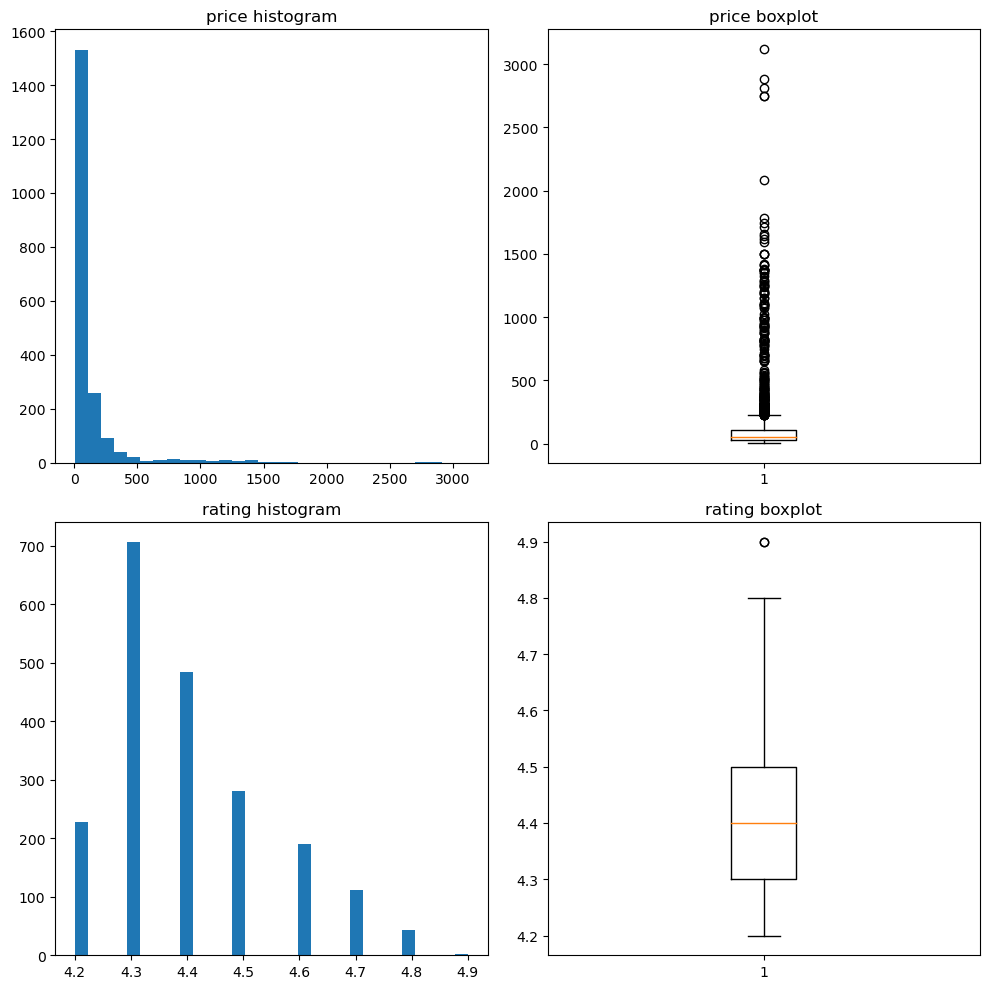

In [8]:
target = ['price', 'rating']

target_df = df[['price', 'rating']]

fig, axes = plt.subplots(nrows = len(target), ncols = 2, figsize = (10, 10))

for i, col in enumerate(target_df):

    axes[i][0].hist(df[col], bins = 30)
    axes[i][0].set_title(f"{col} histogram")
    
    axes[i][1].boxplot(df[col])
    axes[i][1].set_title(f"{col} boxplot")

plt.tight_layout()

Wine $500 and under has more reviews since it is more command to drink. The average wine rating varies from 4.2-4.5.

In [12]:
df[df['rating'] == 4.3]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1114,La Rioja Alta,Vina Ardanza Reserva,2009,4.3,10273,Espana,Rioja,24.38,Rioja Red,4.0,3.0
1115,La Rioja Alta,Vina Ardanza Reserva,2012,4.3,9092,Espana,Rioja,20.00,Rioja Red,4.0,3.0
1116,Familia Torres,San Valentin Parellada,2019,4.3,7401,Espana,Cataluna,6.95,NaN,NaN,NaN
1117,Abadia Retuerta,Seleccion Especial,2016,4.3,7293,Espana,Sardon de Duero,17.48,Red,4.0,3.0
1118,R. Lopez de Heredia,Vina Tondonia Reserva,2008,4.3,6521,Espana,Rioja,37.90,Rioja Red,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1817,Bodegas Gama,Octogenarius,2015,4.3,25,Espana,Rioja,36.90,Grenache,5.0,3.0
1818,Miguel Merino,Gran Reserva,2000,4.3,25,Espana,Rioja,48.81,Rioja Red,4.0,3.0
1819,Los Aguilares,Pinot Noir,2020,4.3,25,Espana,Sierras de Malaga,33.50,Red,4.0,3.0
1820,Nin-Ortiz,Selma de Nin Blanco,2017,4.3,25,Espana,Cataluna,56.95,NaN,NaN,NaN


# Multivariate Visuals

In [30]:
corr = df.corr(numeric_only = True)

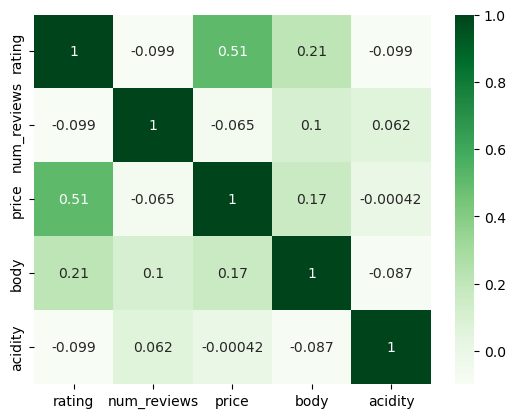

In [32]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

Does wine from a particular region get a higher rating than others?

Do expensive wines get better ratings compared to others?

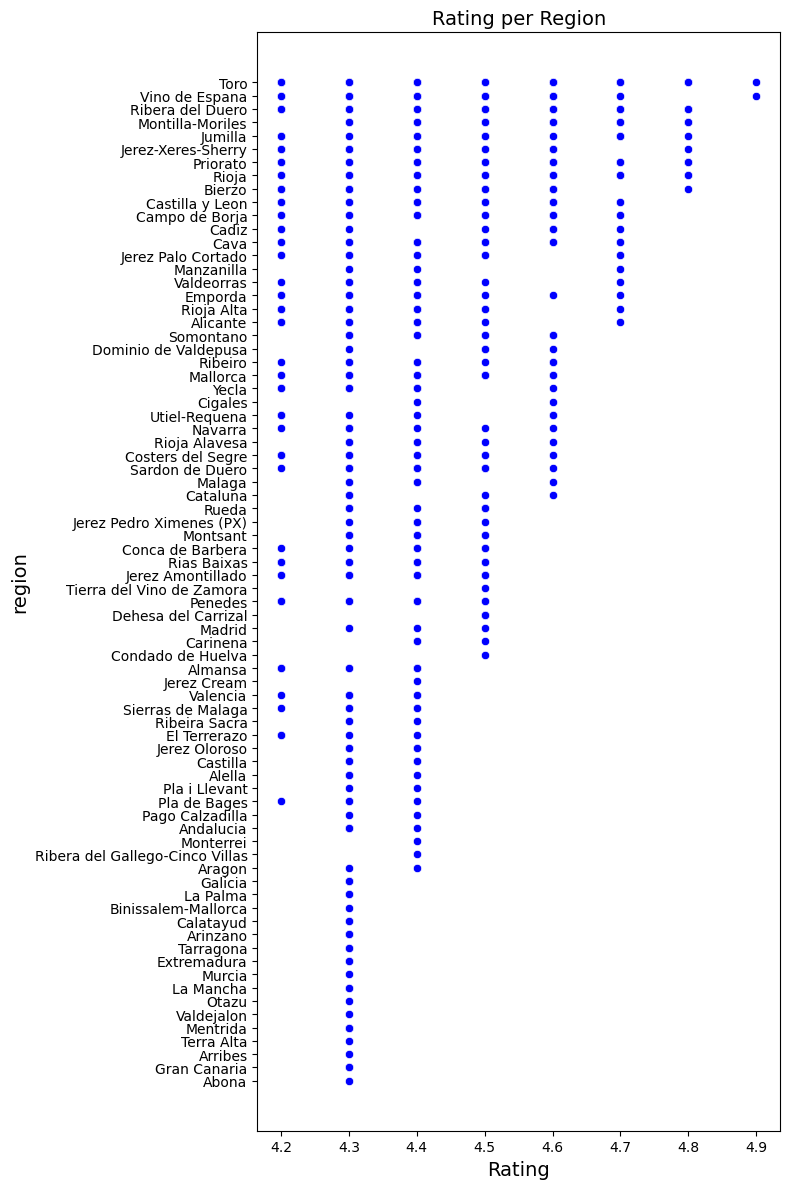

In [42]:
# make plot
fig, ax = plt.subplots(figsize = (8,12))

# labels
ax.set_title('Rating per Region', 
             fontsize = 14) 
ax.set_ylabel('', fontsize = 14) 
ax.set_xlabel('Rating', fontsize = 14)

# scatterplot
sns.scatterplot(data = df, 
               x = 'rating', 
               y = 'region',
               ax = ax,
               c = 'blue')
# display
plt.tight_layout()
plt.show()

Wine from the Toro and Vino de Espana have best ratings at 4.9 being the peak.

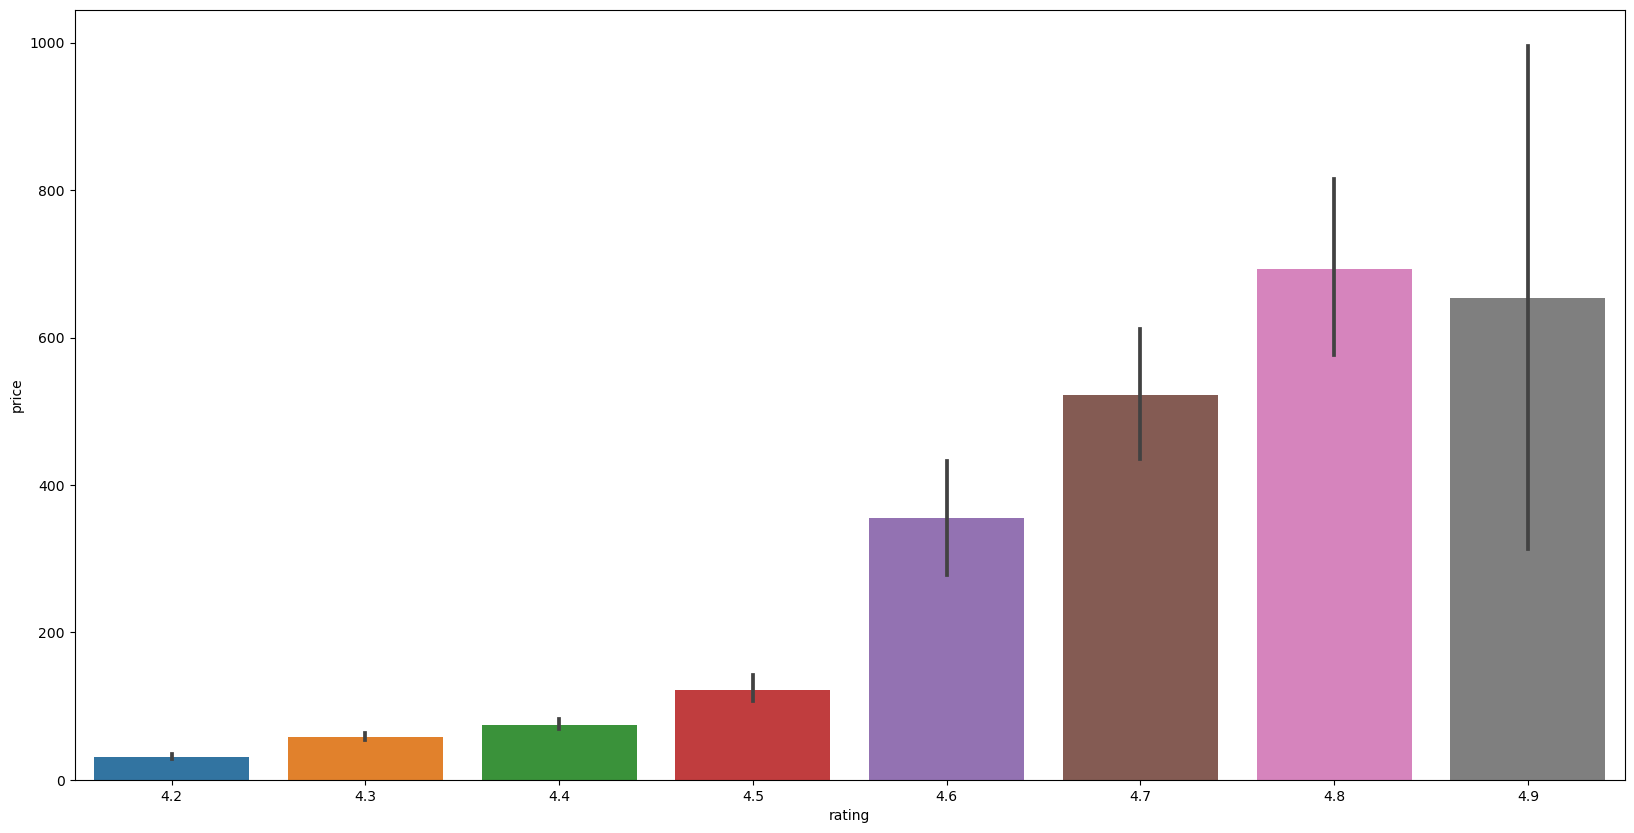

In [69]:
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.barplot(data=df, x='rating', y='price')

Wine which are on the pricier side tend to have the best ratings but that doesn't mean the lower wines are bad/not good tasting.